<a href="https://colab.research.google.com/github/Bhvyd/Sentiment-Analysis/blob/main/Sentiment_Analysis_For_Financial_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install newsapi-python

In [2]:
!pip install yfinance

In [27]:
from newsapi import NewsApiClient
from datetime import date, timedelta, datetime
import sys
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
nltk.download('vader_lexicon')

sia=SentimentIntensityAnalyzer()



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [30]:
def get_sources(category = None):
  newsapi = NewsApiClient(api_key='216e67444a0b4cb4b81fdf636268a389')
  sources = newsapi.get_sources()
  if category is not None:
    rez = [source['id'] for source in sources['sources'] if source['category'] == category and source['language'] == 'en']
  else:
    rez = [source['id'] for source in sources['sources'] if source['language'] == 'en']

  return rez

In [31]:
len(get_sources())

80

In [32]:


#Get the list of the business news sources

get_sources('business')

# Output
# ['australian-financial-review',
# 'bloomberg',
# 'business-insider',
# 'business-insider-uk',
# 'financial-post',
# 'fortune',
# 'the-wall-street-journal']



['australian-financial-review',
 'bloomberg',
 'business-insider',
 'financial-post',
 'fortune',
 'the-wall-street-journal']

In [64]:


from newsapi import NewsApiClient
from datetime import datetime, timedelta
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

def get_articles_sentiments(keywrd, startd, sources_list=None, show_all_articles=False):
    # Initialize the NewsAPI client
    newsapi = NewsApiClient(api_key='216e67444a0b4cb4b81fdf636268a389')

    # Convert the date string to a datetime object if needed
    if type(startd) == str:
        my_date = datetime.strptime(startd, '%d-%b-%Y')
    else:
        my_date = startd

    # If sources list is provided, use it, otherwise fetch articles without filtering by source
    if sources_list:
        articles = newsapi.get_everything(
            q=keywrd,
            from_param=my_date.isoformat(),
            to=(my_date + timedelta(days=1)).isoformat(),
            language="en",
            sources=",".join(sources_list),
            sort_by="relevancy",
            page_size=100
        )
    else:
        articles = newsapi.get_everything(
            q=keywrd,
            from_param=my_date.isoformat(),
            to=(my_date + timedelta(days=1)).isoformat(),
            language="en",
            sort_by="relevancy",
            page_size=100
        )

    # Check if articles were returned
    if 'articles' not in articles or len(articles['articles']) == 0:
        print(f"No articles found for the date {my_date}.")
        return pd.DataFrame()  # Return an empty DataFrame

    article_content = ''
    date_sentiments_list = []
    seen = set()  # To keep track of duplicate articles by title

    # Loop through the articles and calculate sentiments
    for article in articles['articles']:
        if str(article['title']) in seen:
            continue
        else:
            seen.add(str(article['title']))

        article_content = str(article['title']) + '. ' + str(article['description'])

        # Get the sentiment score for the article content
        sentiment = sia.polarity_scores(article_content)['compound']

        # Append the sentiment data to the list
        date_sentiments_list.append((sentiment, article['url'], article['title'], article['description']))

    # Sort the list of sentiments by sentiment score in descending order
    date_sentiments_list = sorted(date_sentiments_list, key=lambda tup: tup[0], reverse=True)

    # Return a DataFrame with all sentiment scores and articles
    return pd.DataFrame(date_sentiments_list, columns=['Sentiment', 'URL', 'Title', 'Description'])

# Example usage:
# Replace '2025-01-31' with the desired start date and 'stock' with the keyword you're searching for
df = get_articles_sentiments(keywrd='stock', startd='01-Feb-2025', sources_list=None)
print(df)


    Sentiment                                                URL  \
0      0.9758  https://slickdeals.net/f/18093532-apple-ipad-p...   
1      0.9612  https://slickdeals.net/f/18093820-lg-77-class-...   
2      0.9571  https://www.businessinsider.com/deepseek-ai-st...   
3      0.8860  https://food52.com/blog/28647-best-nonalcoholi...   
4      0.8658              https://biztoc.com/x/81c9d15a3763e1f7   
..        ...                                                ...   
93    -0.2960  https://www.businessinsider.com/stock-market-c...   
94    -0.3412  https://www.thekitchn.com/costco-del-monte-ban...   
95    -0.3802  https://qz.com/walgreens-suspends-its-dividend...   
96    -0.6639  https://www.businessinsider.com/harvard-droppe...   
97    -0.8555  https://crooksandliars.com/2025/01/how-tank-st...   

                                                Title  \
0   Open-Box - Excellent: 256GB 13" Apple iPad Pro...   
1   77" LG OLED77C3PUA C3 4K Smart OLED evo TV (20...   
2   AI Start

0.29295714285714286
98
0     This seemed like a good deal. All conditions a...
1     Best Buy has 77" LG OLED77C3PUA C3 4K Smart OL...
2     DeepSeek's success creates better chances for ...
3     At Monsoon Market, a natural wine and snack sh...
4     Broadcom (NASDAQ: AVGO) had an incredible 2024...
                            ...                        
93    "DeepSeek means peak in AI capex return expect...
94    “There might not be a better deal.”\nREAD MORE...
95    This story incorporates reporting from Orlando...
96    Steven Wang had been studying at Harvard for e...
97    Donald has always touted the stock market as a...
Name: Description, Length: 98, dtype: object


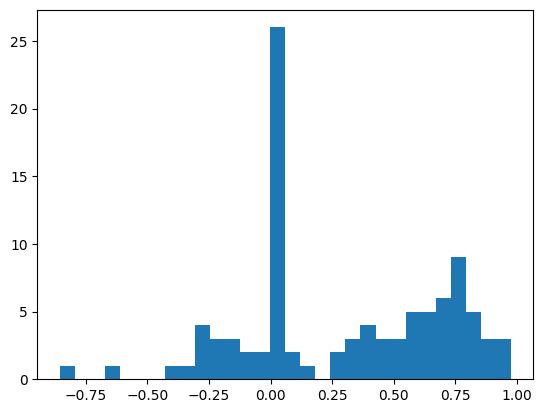

In [65]:

return_articles = get_articles_sentiments(keywrd= 'stock', startd ='01-Feb-2025', sources_list = None, show_all_articles= True)
return_articles.Sentiment.hist(bins=30,grid=False)

print(return_articles.Sentiment.mean())
print(return_articles.Sentiment.count())
print(return_articles.Description)

In [ ]:
return_articles.sort_values(by='Sentiment', ascending=True)[['Sentiment','URL']].head(2)

In [63]:
len(get_sources())

80

In [68]:

from IPython.display import display, HTML

def display_news_sentiment_table(keyword, start_date, sources_list=None):

    # Convert the date string to a datetime object if needed
    if type(start_date) == str:
        start_date = datetime.strptime(start_date, '%d-%b-%Y')
    else:
        start_date = start_date

    # Fetch articles and sentiment scores
    df = get_articles_sentiments(keyword, start_date, sources_list)

    # If no articles are found, print a message
    if df.empty:
        print(f"No articles found for the keyword '{keyword}' on {start_date}.")
        return

    # Select desired columns and rename
    table_df = df[['Sentiment', 'URL', 'Title']]
    table_df = table_df.rename(columns={'Sentiment': 'Sentiment Score', 'URL': 'Article URL'})

    # Display the table using HTML for better formatting
    display(HTML(table_df.to_html(escape=False, index=False)))  # escape=False to render URLs as links

# Example usage
keyword = 'stock'
start_date = '01-Feb-2025'
display_news_sentiment_table(keyword, start_date)

Sentiment Score,Article URL,Title
0.9758,https://slickdeals.net/f/18093532-apple-ipad-pro-13in-256gb-m4-chip-open-box-851?utm_source=rss&utm_content=fp&utm_medium=RSS2,"Open-Box - Excellent: 256GB 13"" Apple iPad Pro M4 OLED Wi-Fi Tablet (Black) $918 & More + Free S&H"
0.9612,https://slickdeals.net/f/18093820-lg-77-class-c3-series-oled-evo-4k-uhd-smart-webos-tv-2023-1-499-99,"77"" LG OLED77C3PUA C3 4K Smart OLED evo TV (2023) $1500 + Free Shipping"
0.9571,https://www.businessinsider.com/deepseek-ai-startups-us-opportunity-open-source-low-cost-training-2025-1,AI Startups in the US see opportunity in DeepSeek's success
0.8860,https://food52.com/blog/28647-best-nonalcoholic-wine,"The Best Non-Alcoholic Wines, According to Experts"
0.8658,https://biztoc.com/x/81c9d15a3763e1f7,Broadcom Stock Doubled in 2024. Can This Dominant AI Stock Double Again in 2025?
0.8555,https://www.forbes.com/sites/investor-hub/article/best-defense-stocks-to-buy-2025/,6 Defense Stocks To Buy In 2025
0.8402,https://www.androidcentral.com/accessories/audio/shokz-openfit-2-review,"Shokz OpenFit 2 review: Wow, do I love these"
0.8176,https://finance.yahoo.com/news/news-corporation-nws-undervalued-entertainment-053330506.html,News Corporation (NWS): Undervalued Entertainment Stock A Good Buy?
0.8074,https://sherwood.news/world/norways-wealth-fund-reports-record-profits-worth-usd319-900-citizen/,"Norway's wealth fund now worth $319,900 per citizen"
0.8074,https://slickdeals.net/f/18092521-hi-peach-layne-comfort-cloud-bath-pillow-5-free-shipping-w-walmart-or-35-orders?utm_source=rss&utm_content=fp&utm_medium=RSS2,Hi Peach Layne Comfort Cloud Bath Pillow (White) $5
